# Практическое задание № 2 по курсу ОММ

## Вариант 6
### Выполнил студент 335 группы Попов Никита

## Постановка задачи

Используя метод переменных направлений, решите краевую задачу:
    \begin{equation*}
        \begin{cases}
             \frac{\partial u}{\partial t}=\Delta u , 0<x<\pi, 0<y<2, t>0
             \\
             \left.\frac{\partial u}{\partial x}\right|_{x=0}=\left.\frac{\partial u}{\partial x}\right|_{x=\pi}=0
             \\
             \left.\frac{\partial u}{\partial y}\right|_{y=0}=\left.\frac{\partial u}{\partial y}\right|_{y=2}=0
             \\
             \left.u\right|_{t=0}=cos(x)\cdot cos(\pi\cdot y)
        \end{cases}
    \end{equation*}

##  Аналитическое решение
Рассмотрим вспомогательную задачу Штурма-Лиувилля для функции $V(x,y)$:

$$\left\{
\begin{aligned}
& \Delta V +\lambda V = 0\\
& \frac{\partial V}{\partial x}\big|_{x=0}=\frac{\partial V}{\partial x}\big|_{x=\pi}=0\\
& \frac{\partial V}{\partial y}\big|_{y=0}=\frac{\partial V}{\partial y}\big|_{y=2}=0
\end{aligned} \right. \label{eq3} $$

Методом разделения переменных она разбивается на 2 задачи

 $$  \left\{
\begin{aligned}
& X''+\nu X = 0\\
& X' \big|_{x=0}= X' \big|_{x=\pi} = 0 \\
\end{aligned} \right.   \hspace{20pt} \left\{
\begin{aligned}
& Y''+\mu Y = 0\\
& Y' \big|_{y=0}= Y' \big|_{y=2} = 0
\end{aligned} \right. $$


Решаем их и для функции $V$ получаем: $V_{nm}=cos(\frac{\pi my}{2})cos(nx)$, n,m = 1,2,...

Нулевому собственному значению соответствует собственная функция, равная 1, остальные собственные значения равны $\lambda_{nm} = n^2 + (\frac{\pi m}{2})^2 $

Решение задачи ищется в виде: 

$$V= \sum\limits_{n=1}^\infty \sum\limits_{m=1}^\infty V_{nm}(x,y) T_{nm}(t) $$

Начальное условие это функиця $V_{1,2}$, значит, n=1, m=2.

Для T: \begin{cases}
\frac{dT}{dt}+(1+\pi ^2) T=0
\\
T(0)=1
\end{cases}
 
Итоговое решение задачи: $$u(x,y,t)=cos(x)cos(\pi y)e^{-(1+\pi^2)t}$$

## Построение разностной схемы
Введем одномерные разностные временную и пространственные сетки в области 
$\Omega = G\otimes[0,T]$:

\begin{equation}
        G: \{(x, y)| x \in (0; \pi), y \in (0; 2)\}
       \\
     \omega_{h} : \{(x_i,y_j)| x_i = ih_x, \ i = \overline{0,N_x}, \ N_xh_x = \pi; \\
     y_j = jh_y, \ j = \overline{0,N_y}, \ N_yh_y = 2\} \\
     \omega_{\tau} : t_k = k\tau, \ k = \overline{0,N_{\tau}}, \ \tau N_{\tau} = T
\end{equation}
\begin{equation}
    \omega_{h\tau} = \omega_{h}\otimes \omega_{\tau}
\end{equation}
где $N_{\tau}, N_x, N_y$ - число узлов сетки; $h_x, h_y, h_{\tau}$ - шаги по осям x, y, t соответственно. На введенной сетке будем рассматривать сеточные функции $U^k_{ij} = U(x_i, y_j, t^k)$

Введем разностную аппроксимацию оператора Лапласа:
\begin{equation}
    \Lambda U^k_{ij} = \Lambda_x U^k_{ij} + \Lambda_y U^k_{ij}
    \\
    \Lambda_x U^k_{ij} = \dfrac{U^k_{(i+1)j} - 2 U^k_{ij} + U^k_{(i-1)j}}{h_x^2}
    \\
    \Lambda_y U^k_{ij} = \dfrac{U^k_{i(j+1)} - 2 U^k_{ij} + U^k_{i(j-1)}}{h_y^2}
\end{equation}

Начальные условия для функции $U^k_{ij}$ записываются в виде
$$ U^0_{ij} = cos(ih_x)cos(\pi jh_y)$$

Граничные условия по x аппроксимируются следующим образом:
$$
\begin{cases}
        U_{1j} = U_{0j}, \ j = \overline{0,N_{y}}\\
        U_{N_x,j} = U_{(N_{x}-1,j)}, \ j = \overline{0,N_y} 
\end{cases}
$$

Граничные условия по y аппроксимируются следующим образом:
$$
\begin{cases}
        U_{i0} = U_{i1}, \ i = \overline{0,N_{y}}\\
        U_{i,N_y} = U_{i,(N_{y}-1)} = 0, \ i = \overline{0,N_x} 
\end{cases}
$$

В данной задаче мы будем рассматривать схему переменных направлений, являющейся объединением явной и неявной схемы.При переходе со слоя $k$ на $k+\frac{1}{2}$ будем использовать неявную схему по переменной $x$ и явную схему по переменной $y$. При переходе с полуцелого слоя $k+\frac{1}{2}$ на следующий целый слой $k+1$ будем пользоваться неявной схемой по переменной $y$ и явной по $x$.
 
Таким образом, получаем разностную задачу в виде:
$$\begin{equation}
 \left\{
\begin{aligned}
&  \frac{U^{k+\frac{1}{2}}_{i,j}-U^{k}_{i,j}}{0.5 \tau}= \Lambda_{1}\omega^{k+1/2}_{i,j}+\Lambda_{2}U_{i,j}^{k}\\
&  \frac{U^{k+1}_{i,j}-U^{k+\frac{1}{2}}_{i,j}}{0.5 \tau}=\Lambda_{1}U^{k+1/2}_{i,j}+\Lambda_{2}U_{i,j}^{k+1}\\
\end{aligned} \right. \label{eq6}
\end{equation} $$

Переписывая операторы в явном виде и проделывая некоторые математические преобразования, получаем следующее:

$$\begin{equation}
 \left\{
\begin{aligned}
& 0.5 \gamma_{1} U^{k+0.5}_{i-1,j}-(1+\gamma_{1}) U^{k+0.5}_{i,j} + 0.5\gamma_{1} U^{k+0.5}_{i+1,j} = -\underbrace{\bigg{(}(1-\gamma_{2}) U^{k}_{i,j}+ 0.5\gamma_{2}(U^{k}_{i,j-1}+U^{k}_{i,j+1})\bigg{)}}_{F_{i}^{x}}, j=\overline{1,M-1} \\
& 0.5 \gamma_{2} U^{k+1}_{i,j-1}-(1+\gamma_{2}) U^{k+1}_{i,j} + 0.5\gamma_{2} U^{k+1}_{i,j+1} = -\underbrace{\bigg{(}(1-\gamma_{1}) U^{k+0.5}_{i,j}+ 0.5\gamma_{1}(U^{k+0.5}_{i-1,j}+U^{k+0.5}_{i+1,j})\bigg{)}}_{F_{j}^{y}}, i=\overline{1,N-1} \\
\end{aligned} \right. \label{eq7}
\end{equation}$$

Где $\gamma_{1} = \frac{\tau}{h^2_{x}}$, $\gamma_{2} = \frac{\tau}{h^2_{y}}$.

Учитывая граничные условия
$ U_{1j} = U_{0j}, U_{N_x,j} = U_{(N_{x}-1,j)}$
и вводя следующие обозначения:$ U^{k+0.5}_{ij}=y_{m}, U^{k+0.5}_{i-1,j}=y_{m-1}, $$A_{x} = C_{X} = 0.5\gamma_{1}, B_{x}= 1-\gamma_{1}, F_{i}^{x} = (1-\gamma_{2}) U^{k}_{i,j}+ 0.5\gamma_{2}(U^{k}_{i,j-1}+U^{k}_{i,j+1})$, для  k=0.5 временного слоя получаем задачу:

\begin{equation}
    A_{x}y_{m-1}-B_{x}y_{m}+C_{x}y_{m+1}=-F^{x}_{m},
    \\
    y_0 = y_1, y_N = y_{n-1}
\end{equation}

Согласно достаточному условию применения метода прогонки, достаточно, чтобы выполнялись следующие условия:
\begin{equation}
    |B_i|\geq|A_i| + |C_i| , \;\;\; \alpha_{1,2} \in [0, 1], \;\;\;\; i = \overline{1, N}
\end{equation}

Видно, что условие выполнено. Значит, в данном случае можно применять метод прогонки. 
Абсолютно аналогично можно перейти на шаг k+1, осуществив прогонку вдоль оси y.


## Метод прогонки
Решение будем искать в виде:
: $y_{m} = d_{m+1}y_{m+1} + \sigma_{m+1}$

Тогда:
\begin{align}
    &\ A_x(d_m y_m + \sigma_m) - B_x y_m + C_x y_{m+1} = F_m \\
    &\ (A_xd_m - B_m)y_m = -C_m y_{m+1} + F_m - \sigma_m A_x \\
    &\ y_{m+1}\left[ (A_xd_m - B_x)d_{m+1} + C_m \right] = F_m - \sigma_m A_x - (A_xd_m - B_m)\sigma_{m+1}
\end{align}

Для того, чтобы это соотношение было верно для любых $y_{m+1}$ нужно, чтобы выражение в квадратных скобках и правая часть было равны нулю. Приравнивая их нулю, получаем рекуррентные формулы для определения прогоночных коэффициентов:
\begin{equation}
    d_{m+1} = \dfrac{C_x}{B_x - A_x d_m}, \;\;\;\;\;\; \sigma_{m+1} = \dfrac{F_m - \sigma_m A_x}{A_xd_m - B_x}
\end{equation}

Сравнивая граничные условия задачи с выражением $y_{m-1} = d_my_m + \sigma_m$, находим $d_1 = 1$, $\sigma_1 = 0$

Используя эти значения $d_1$ и $\sigma_1$, совершим прогонку в направлении возрастания индекса, последовательно определяя значения коэффициентов $d_m$ и $\sigma_m$ для $m = \overline{1, N-1}$.

На правом конце также есть граничное условие. $y_{N-1} = d_N y_N + \sigma_N$ и $y_N = y_ {N-1}$.  Из этих соотношений получаем: 
\begin{equation}
    y_N = \dfrac{\sigma_N}{1 - d_N} \label{eq:p3}     
\end{equation}

При $d_1 = \alpha_1$ и коэффициантах данной задачи получаем, что знаменатель положительный. Следовательно значение $y_N$ определено.

Используя найденное значение $y_N$, делаем обратную прогонку в сторону уменьшающихся значений индекса, поледовательно определяя значения $y_i$.

## Точность аппроксимации разностной схемы

Чтобы определить точность аппроксимации, необходимо представить каждый член из разностного представления производных в виде ряда Тейлора по шагу. Давайте этим и займёмся:
\begin{equation*}
\begin{cases}
\omega^{j+1} = \omega^{j+\frac{1}{2}} + \frac{\tau}{2}\omega_t^{j+\frac{1}{2}} + \frac{1}{2}\frac{\tau^2}{4}\omega^{j+\frac{1}{2}}_{tt} + \frac{1}{2}\frac{\tau^3}{8}\omega^{j+\frac{1}{2}}_{ttt} + O(\tau^4)\\
\omega^{j} = \omega^{j+\frac{1}{2}} - \frac{\tau}{2}\omega_t^{j+\frac{1}{2}} + \frac{1}{2}\frac{\tau^2}{4}\omega^{j+\frac{1}{2}}_{tt} - \frac{1}{2}\frac{\tau^3}{8}\omega^{j+\frac{1}{2}}_{ttt} + O(\tau^4)
\end{cases}
\end{equation*}
Тогда в точке ${t^{j+\frac{1}{2}}}$ аппроксимация производной по времени будет выглядеть следующим образом:
\begin{equation*}
\frac{\omega^{j+1} - \omega^{j}}{\tau} = \frac{1}{\tau}\left(\tau\omega^{j+\frac{1}{2}} + \frac{1}{2}\frac{\tau^3}{8}\omega^{j+\frac{1}{2}}_{ttt} + O(\tau^4)\right) = w^{j+\frac{1}{2}} + \frac{1}{2}\frac{\tau^3}{8}\omega^{j+\frac{1}{2}}_{ttt} + O(\tau^3) = \omega^{j+\frac{1}{2}}_t + O(\tau^2)
\end{equation*}
Аналогично мы аппроксимируем и производные по координате:
\begin{equation*}
\begin{cases}
\Lambda_1\omega = \frac{\omega_{n-1,m} - 2\omega_{n,m} + \omega_{n+1,m}}{h_x^2}\\
\Lambda_2\omega = \frac{\omega_{n,m-1} - 2\omega_{n,m} + \omega_{n,m+1}}{h_y^2}\\
\end{cases}
\end{equation*}
Тогда, для фиксированного m получим:
\begin{equation*}
\begin{cases}
\omega_{n+1} = \omega_n + h_x\omega^{'}_n + \frac{1}{2}h_x^2\omega^{''}_n + \frac{1}{6}h_x^3\omega^{'''}_n + \frac{1}{24}h_x^4\omega^{''''}_n + O(h_x^5)\\
\omega_{n-1} = \omega_n - h_x\omega^{'}_n + \frac{1}{2}h_x^2\omega^{''}_n - \frac{1}{6}h_x^3\omega^{'''}_n + \frac{1}{24}h_x^4\omega^{''''}_n + O(h_x^5)
\end{cases}
\end{equation*}
Откуда:
\begin{equation*}
\frac{\omega_{n+1} -2\omega_n + \omega_{n-1}}{h_x^2} = \frac{1}{h_x^2}\left(h_x^2\omega^{''}_n + \frac{1}{12}h_x^4\omega^{''''}_n + O(h_x^2)\right) = \omega^{''}_n + \frac{1}{12}h_x^2\omega^{''''}_n + O(h_x^3) = \omega_n^{''} +O(h_x^2)
\end{equation*}
Аналогично получается и для производной по y.
Такми образом, порядок апроксимации разностной схемы переменного направления:
${O(\tau^2 + h_x^2 + h_y^2)}$


## Критерий Неймана

Проверим необходимое условие Неймана для нашей разностной схемы. Рассмотрим переход с j-го на (j+1)-й временной слой. Пусть ${v_{n,m} = e^{i\alpha m + i\beta n}}$. Ищем решение на слое ${(j+\frac{1}{2})}$ в виде ${v_{n,m}^{0.5} = \lambda_1v_{m,n}}$, а на ${(j+1)}$-ом как ${v^{j+1}_{n,m} = \lambda_2v_{n,m}^{0.5} = \lambda_1\lambda_2v_{n,m}}$\\
Подставляя эти решения в уравнения схемы и преобрауя, получим:
\begin{equation*}
\begin{cases}
\lambda_1 = \frac{1 - 2\frac{\tau}{h_x^2}sin^2\frac{\alpha}{2}}{1 + 2\frac{\tau}{h_y^2}sin^2\frac{\beta}{2}}\\
\lambda_2 = \frac{1 - 2\frac{\tau}{h_y^2}sin^2\frac{\beta}{2}}{1 + 2\frac{\tau}{h_x^2}sin^2\frac{\alpha}{2}}\\
\end{cases}
\end{equation*}
Теперь подставим в ${\lambda_1\lambda_2}$:
\begin{equation*}
\lambda_1\lambda_2 = \frac{1 - 2\frac{\tau}{h_x^2}sin^2\frac{\alpha}{2}}{1 + 2\frac{\tau}{h_y^2}sin^2\frac{\beta}{2}} . \frac{1 - 2\frac{\tau}{h_y^2}sin^2\frac{\beta}{2}}{1 + 2\frac{\tau}{h_x^2}sin^2\frac{\alpha}{2}}
\end{equation*}
Получаем, что всегда выполнено ${|\lambda_1\lambda_2|\leq1}$. Схема безусловно устойчива.

## Код программы
Импортируем необходимые библиотеки

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm

Создаем сетку по $ x,y,t$, где $0<x<\pi $, $0<y<2$ и $ t>0 $

In [21]:
Nx, Ny, M = 100, 100, 100 # количество шагов
X1, X2 = 0, np.pi # граничные условия
Y1, Y2 = 0, 2
T1, T2 = 0, 0.3   # приблизительное время затухания

x = np.linspace(X1,X2,Nx)
y = np.linspace(Y1,Y2,Ny) 
t = np.linspace(T1,T2,M)

h_x=x[1]-x[0]
h_y=y[1]-y[0]
tau=t[1]-t[0]

gamma_x = tau / (h_x**2)
gamma_y = tau / (h_y**2)

u=np.zeros((Nx,Ny,M*2+1))

#начальное условие
for i in range(0,Nx):              
    for j in range(0,Ny):
        u[i,j,0]=np.cos(x[i])*np.cos(np.pi*y[j])

Определим функцию прогонки по оси x

In [22]:
def F_1(i1,i2,j):
    return 0.5 * gamma_y*(u[i1,i2-1,j-1]+u[i1,i2+1,j-1])+(1-gamma_y)*u[i1,i2,j-1]
def progonka_x(i2, j):
    d = np.zeros(Nx)
    sigma = np.zeros(Nx)
    d[1] = 1
    sigma[1] = 0
    A = 0.5 * gamma_x
    B = 1 + gamma_x
    C = 0.5 * gamma_x
    for m in range(1,Nx-1):
        Fm = - F_1(m,i2,j)
        d[m+1] = C / (B - A * d[m])
        sigma[m+1] = (Fm - A * sigma[m]) / (A * d[m] - B)
    u[Nx-1, i2, j] = sigma[-1]/(1-d[-1])
    for m in range(Nx-1, 0, -1):
        u[m-1, i2, j] = d[m] * u[m, i2, j] + sigma[m]


Определим функцию прогонки по оси y

In [23]:
def F_2(i1,i2,j):
    return 0.5 * gamma_x*(u[i1-1,i2,j-1]+u[i1+1,i2,j-1])+(1-gamma_x)*u[i1,i2,j-1]
def progonka_y(i1,j):
    d=np.zeros(Ny)             
    sigma = np.zeros(Ny)
    d[1] = 1
    sigma[1] = 0
    A = 0.5 * gamma_y
    B = 1 + gamma_y
    C = 0.5 * gamma_y

    for m in range (1,Ny-1):
        Fm=-F_2(i1,m,j)
        d[m+1] = C / (B - A * d[m])  
        sigma[m+1] = (Fm - A * sigma[m]) / (A * d[m] - B)
    u[i1,Ny-1,j]= sigma[-1]/(1-d[-1])
    for m in range (Ny-1,0,-1):
        u[i1,m-1,j]=d[m] * u[i1,m,j] + sigma[m]

Выполним прогонку по x, чтобы перейти на слой j+1/2, потом с помощью прогонки по оси y перейдем на слой j+1. Из-за этого нам требуется увеличенный в 2 раза размер массива времени.

In [24]:
for j in tqdm.tqdm_notebook(range(1,2*M,2)):
    for i2 in range(1,Ny-1):
        progonka_x(i2,j)
    for i1 in range(1,Nx-1):
        progonka_y(i1,j+1)

C:\Users\Nikita Sergeevich\anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


Таким образом мы получили численное решение задачи методом переменных направлений. 
Сравним его теперь с аналитическим решением.
## Ввод аналитического решения

In [25]:
z=np.zeros((Nx,Ny,M*2+1))

for i in tqdm.tqdm_notebook(range(0,Nx)):              
    for j in range(0,Ny):
        for k in range(0,M):
            z[i,j,k]=np.cos(x[i])*np.cos(np.pi*y[j])*np.exp(-(1+np.pi**2)*t[k])

C:\Users\Nikita Sergeevich\anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Аналитическое решение z (x, y, t) в момент времени t = 0')

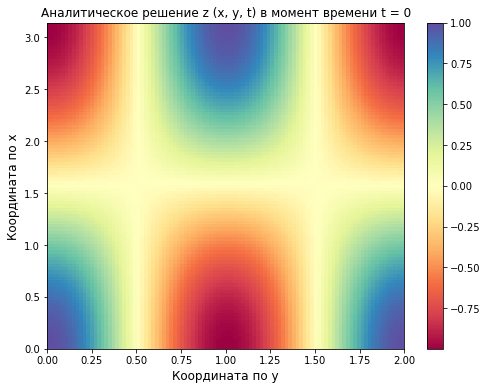

In [7]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,z[:,:,0],cmap='Spectral')
plt.colorbar()
plt.ylabel('Координата по х', fontsize =12)
plt.xlabel('Координата по y', fontsize =12)
plt.title('Аналитическое решение z (x, y, t) в момент времени t = '+str(0))

Визуализируем наше решение. Для начала выведем численное и аналитическое решение рядом в начальный момент времени и в динамике в разные моменты времени, потом посмотрим на их разность, чтобы удостовериться, что значения очень мало отличаются друг от друга.

## Численное решение

Text(0.5, 1.0, 'Численное решение U (x, y, t) в момент времени t = 0')

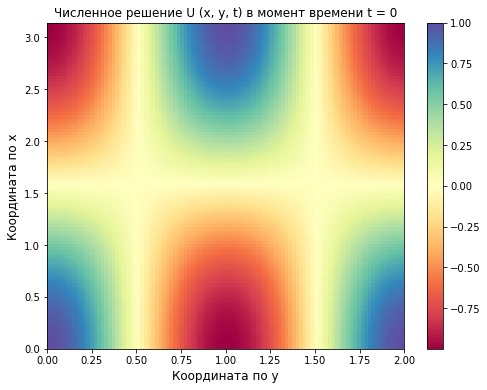

In [8]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,u[:,:,0],cmap='Spectral')
plt.colorbar()
plt.ylabel('Координата по х', fontsize =12)
plt.xlabel('Координата по y', fontsize =12)
plt.title('Численное решение U (x, y, t) в момент времени t = '+str(0))

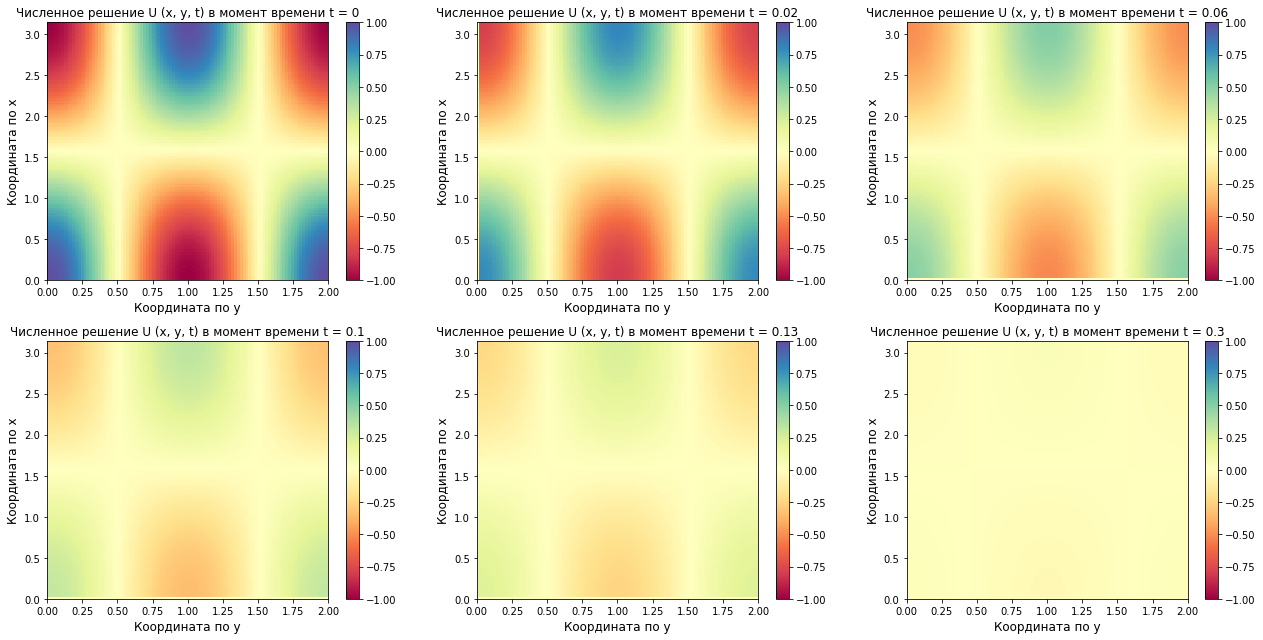

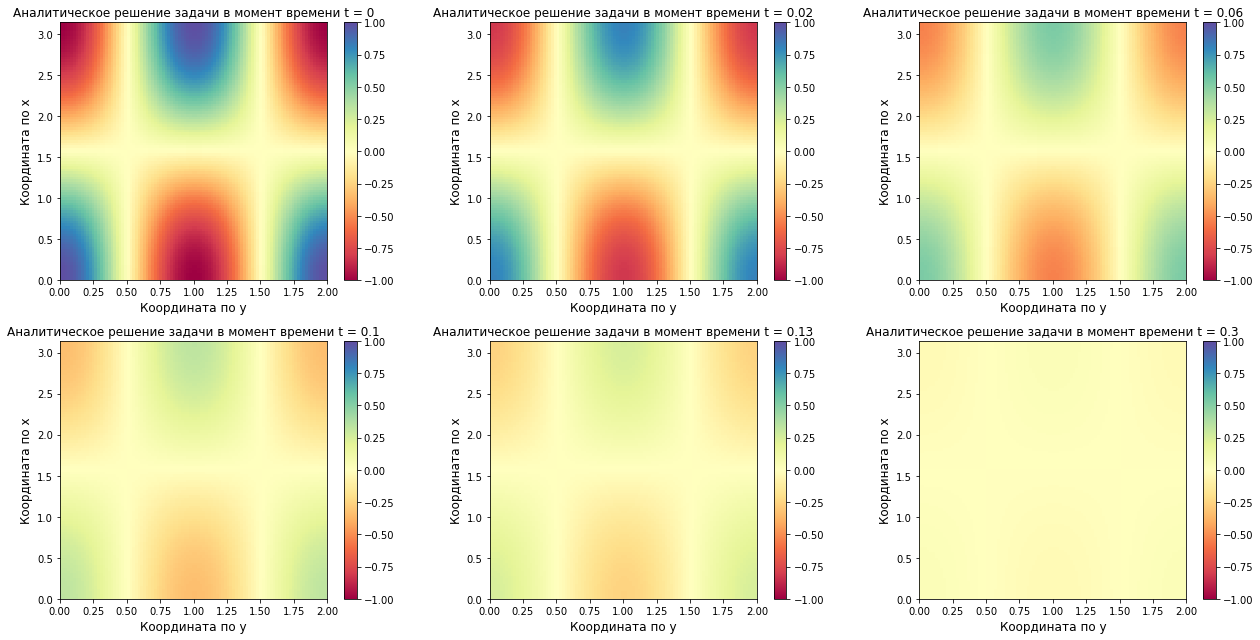

In [9]:
times=[0,0.02, 0.06, 0.1, 0.13, 0.3]
fig = plt.figure(figsize = (18,9))
for i in range(len(times)):
    plt.subplot(2,3,i+1)
    r = int(times[i]/T2*(2*M))
    plt.pcolormesh(y,x,u[:,:,r],cmap='Spectral',vmin=-1,vmax=1)
    plt.colorbar()
    plt.ylabel('Координата по х', fontsize =12)
    plt.xlabel('Координата по y', fontsize =12)
    plt.title('Численное решение U (x, y, t) в момент времени t = '+str(times[i]),fontsize=12)
plt.tight_layout()

fig = plt.figure(figsize = (18,9))
for i in range(len(times)):
    plt.subplot(2,3,i+1)
    r = int(times[i]/T2*(M-1))
    plt.pcolormesh(y,x,z[:,:,r],cmap='Spectral',vmin=-1,vmax=1)
    plt.colorbar()
    plt.ylabel('Координата по х', fontsize =12)
    plt.xlabel('Координата по y', fontsize =12)
    plt.title('Аналитическое решение задачи в момент времени t = '+str(times[i]),fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


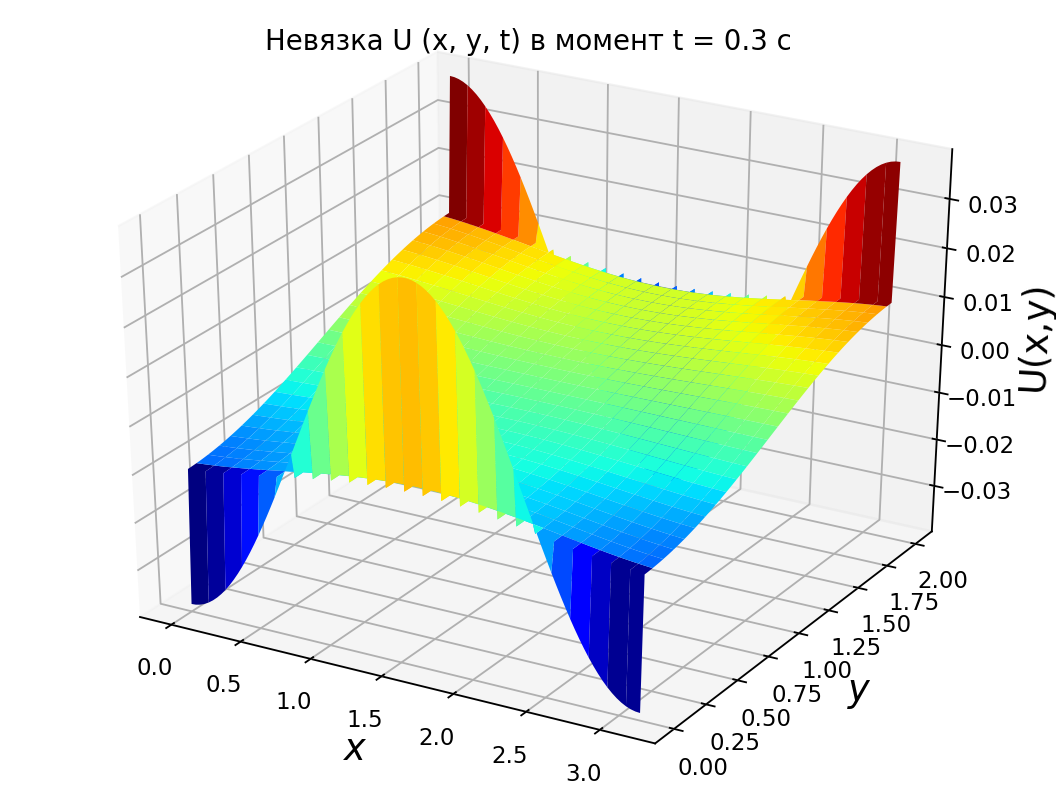

In [29]:
%matplotlib notebook
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

fig = pylab.figure()
axes = Axes3D(fig)

x1,y1 = np.meshgrid(x,y)
t_const=99

axes.plot_surface(x1, y1, u[:,:,2 * t_const]- z[:,:,t_const], rstride=4, cstride=4, cmap = cm.jet)

pylab.xlabel('$x$', size=16)
pylab.ylabel('$y$', size=16)
axes.set_zlabel('U(x,y)', size = 16)
pylab.title('Невязка U (x, y, t) в момент t = ' +str(round(t_const * tau,4)) + ' с')

pylab.show()

Ну и наконец выведем 3D график нашего численного решения, для наглядности. Как видно численные методы дают весьма точное значение во всех точках за исключением граничных.
### Начальное значение

<IPython.core.display.Javascript object>


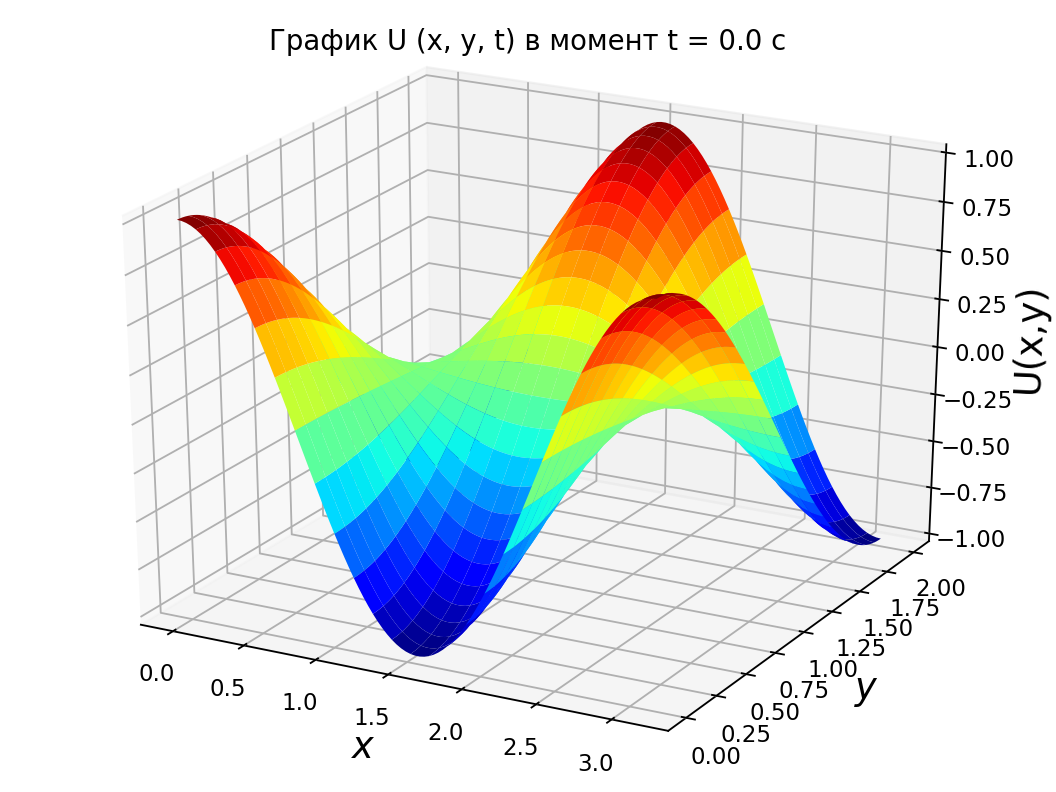

In [12]:
%matplotlib notebook
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

fig = pylab.figure()
axes = Axes3D(fig)

x1,y1 = np.meshgrid(x,y)
t_const=0

axes.plot_surface(x1, y1, u[:,:,2 * t_const], rstride=4, cstride=4, cmap = cm.jet)

pylab.xlabel('$x$', size=16)
pylab.ylabel('$y$', size=16)
axes.set_zlabel('U(x,y)', size = 16)
pylab.title('График U (x, y, t) в момент t = ' +str(round(t_const * tau,4)) + ' с')

pylab.show()

Во время t=0.3 сек.
Следует обратить внимание на то что масштаб по оси U(x,y) у этих графиков разный и это единственная причина, по которой они выглядят похоже. На самом деле мы здесь наблюдаем постепенное выравнивание колебаний. В рамках нашей задачи это может быть воспринято, как постепенное распределение тепла по поверхности и выравнивания температура

<IPython.core.display.Javascript object>


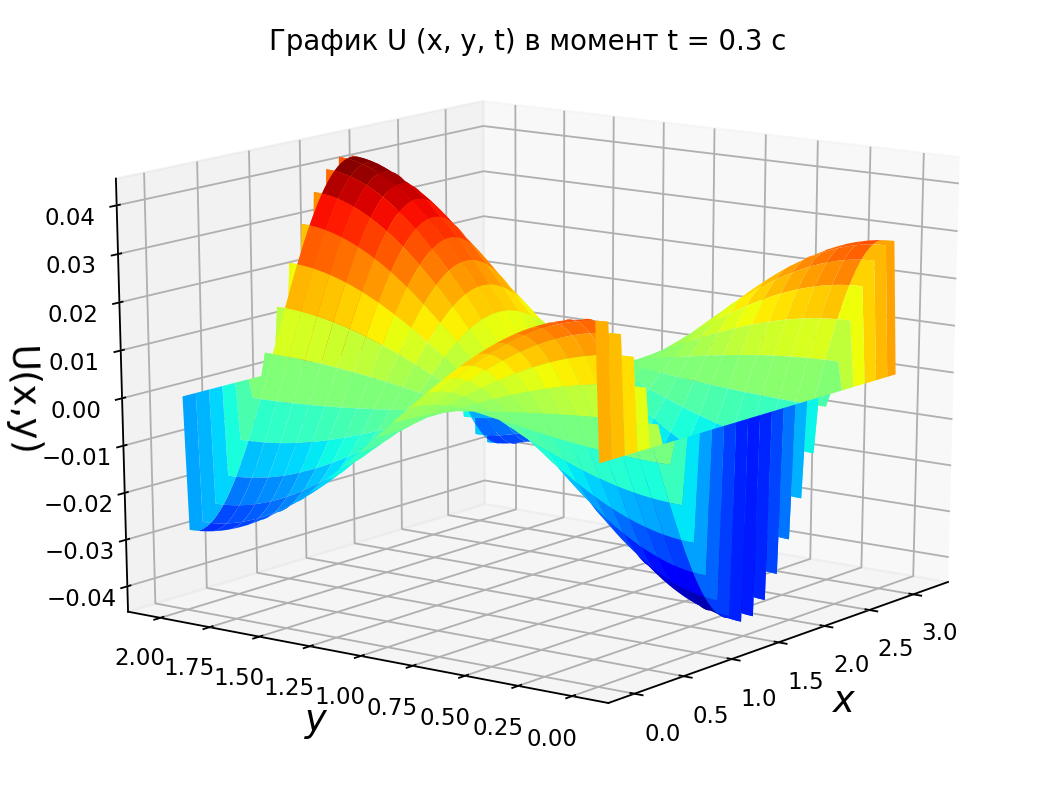

In [27]:
%matplotlib notebook
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

fig = pylab.figure()
axes = Axes3D(fig)

x1,y1 = np.meshgrid(x,y)
t_const=99

axes.plot_surface(x1, y1, u[:,:,2 * t_const], rstride=4, cstride=4, cmap = cm.jet)

pylab.xlabel('$x$', size=16)
pylab.ylabel('$y$', size=16)
axes.set_zlabel('U(x,y)', size = 16)
pylab.title('График U (x, y, t) в момент t = ' +str(round(t_const * tau,4)) + ' с')

pylab.show()